In [1]:
# widen jupyter notebook window
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:75% !important; }</style>"))

In [2]:
import sys

sys.path.insert(0, '/media/rich/Home_Linux_partition1/github_repos/tensorly')

import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.autograd import Variable

# # Import TensorLy
# import tensorly as tl
# from tensorly.tucker_tensor import tucker_to_tensor
# from tensorly.random import check_random_state

In [3]:
sys.path.insert(0, '/media/rich/Home_Linux_partition1/github_repos/tensorly')

import tensorly as tl
import tensorly.decomposition
import tensorly.random


In [4]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import tensorly; print("TensorLy", tensorly.__version__)
import torch; print("PyTorch", torch.__version__)

Linux-5.4.0-54-generic-x86_64-with-glibc2.10
Python 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
NumPy 1.19.2
SciPy 1.5.2
TensorLy 0.5.0
PyTorch 1.7.0


In [5]:
tl.set_backend('pytorch')

Make the results reproducible by fixing the random seed

In [6]:
random_state = 1234
rng = tensorly.random.check_random_state(random_state)
device = 'cuda:0'
# device = 'cpu'

In [7]:
### import data

dir_inputTensor = f'/media/rich/bigSSD RH/res2p/Camera data/round 4 experiments/mouse 6.28/20201102/cam3/run3'
fileName_inputTensor = f'Sxx_allPixels.npy'
path_inputTensor = f'{dir_inputTensor}/{fileName_inputTensor}'
inputTensor = np.load(path_inputTensor)

In [8]:
tensor = tl.tensor(inputTensor[:,:,:4000, :] , device=device , requires_grad=True)
# tensor = tl.tensor(tensor[ , device=device , requires_grad=True)

import gc

del inputTensor
gc.collect()

In [9]:
rank_toUse = 6
ranks = [rank_toUse , rank_toUse, rank_toUse , rank_toUse]
# core = tl.tensor(rng.random_sample(ranks), device=device, requires_grad=True)

# factors = [tl.tensor(rng.random_sample((tensor.shape[i], ranks[i])),
#                  device=device, requires_grad=True) for i in range(tl.ndim(tensor))]

weights = tl.tensor(np.ones(rank_toUse) , device=device, requires_grad=True)

In [33]:
#basic libary
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import pandas as pd


##Define Function and class to be used

prox_plus = nn.Threshold(0,0) ## to make all output postive 

class NTF(nn.Module):## Model for task 1
    def __init__(self):
        super(NTF, self).__init__()

#         self.factors = nn.ParameterList([nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[i], ranks[i])) , device='cuda:0').double(), requires_grad=True) for i in range(tensor.ndim)])
        
#         self.factors = [tl.tensor(rng.random_sample((tensor.shape[i], ranks[i])), device='cuda:0', requires_grad=True) for i in range(tl.ndim(tensor))]

        self.factors1 = nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[0], ranks[0])) , device='cuda:0').double(), requires_grad=True) 
        self.factors2 = nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[1], ranks[1])) , device='cuda:0').double(), requires_grad=True) 
        self.factors3 = nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[2], ranks[2])) , device='cuda:0').double(), requires_grad=True) 
        self.factors4 = nn.Parameter(torch.tensor(rng.random_sample((tensor.shape[3], ranks[3])) , device='cuda:0').double(), requires_grad=True) 

#         self.factors1 = torch.tensor(rng.random_sample((tensor.shape[0], ranks[0])) , device='cuda:0', requires_grad=True) 
#         self.factors2 = torch.tensor(rng.random_sample((tensor.shape[1], ranks[1])) , device='cuda:0', requires_grad=True) 
#         self.factors3 = torch.tensor(rng.random_sample((tensor.shape[2], ranks[2])) , device='cuda:0', requires_grad=True) 
#         self.factors4 = torch.tensor(rng.random_sample((tensor.shape[3], ranks[3])) , device='cuda:0', requires_grad=True) 
        
    def forward(self):
        tmp = list((self.factors1 , self.factors2 , self.factors3 , self.factors4))

#         return prox_plus(tl.cp_tensor.cp_to_tensor((weights, list([ torch.tensor(task1.factors[i]) for i in range(tensor.ndim) ])))).double()
#         return prox_plus(tl.cp_tensor.cp_to_tensor((weights, self.factors))).double()
        return prox_plus(tl.cp_tensor.cp_to_tensor((weights, tmp))).double()

print('Start training on Task 1...')

goal_tensor = tensor.double()

ntf_obj = NTF()
n_epoch =5000
lr = 0.02
loss_fn = nn.MSELoss(reduction='sum')
loss_rolling=[] #collect loss
# optimizer = optim.SGD(((ntf_obj.factors1, ntf_obj.factors2 , ntf_obj.factors3 , ntf_obj.factors4)),  lr=lr)
# optimizer = torch.optim.Adam(ntf_obj.parameters(), lr=lr)
optimizer = torch.optim.Adam(((ntf_obj.factors1, ntf_obj.factors2 , ntf_obj.factors3 , ntf_obj.factors4)),  lr=lr)
# optimizer = torch.optim.Adam(ntf_obj.factors, lr=lr)

for epoch in range(n_epoch):
    Y_ = ntf_obj()
#     loss = loss_fn(Y_, gratorch)
    loss = tl.norm((Y_ - goal_tensor), 2)
    ntf_obj.zero_grad() # need to clear the old gradients
    loss.backward()
    optimizer.step()
#    task1loss.append(loss)
    if(epoch%10==0):
        loss_rolling.append(loss)
#         print(loss)
        print(f'loss = {loss.cpu().detach().numpy()[None][0]}')
        
print('Learning curve for Task 1')

Start training on Task 1...
loss = 25706.51246050163
loss = 19401.13389140422
loss = 16744.30054005208
loss = 16472.121311516636
loss = 16190.124409089913
loss = 16082.247526798934
loss = 15995.860608058407
loss = 15894.629668494723
loss = 15740.989377726195
loss = 15524.419356383622
loss = 15274.825658249754
loss = 15053.284887152779
loss = 14893.187140113441
loss = 14785.13426082493
loss = 14712.12038127228
loss = 14657.460371032063
loss = 14617.275975713186
loss = 14587.04562677215
loss = 14563.969738334932
loss = 14545.756361797217
loss = 14530.762990049167


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


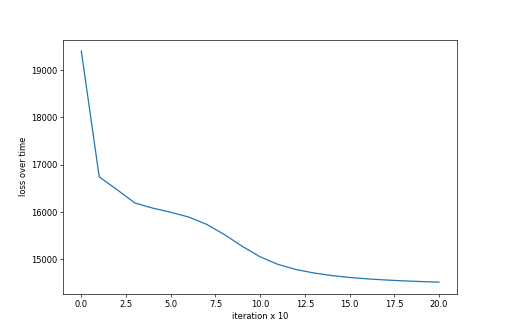

Final loss on Task 1: 
tensor(14518.0320, device='cuda:0', dtype=torch.float64,
       grad_fn=<NormBackward1>)


In [34]:
plt.figure()
plt.plot(loss_rolling[1:])
plt.ylabel('loss over time')
plt.xlabel('iteration x 10')
plt.show()

print('Final loss on Task 1: ')
print(loss_rolling[-1])

In [ ]:
del tensor
# del core
del factors
del rec

In [ ]:
del optimizer
del loss

In [11]:
import gc
gc.collect()

111

In [14]:
torch.cuda.empty_cache()

<IPython.core.display.Javascript object>


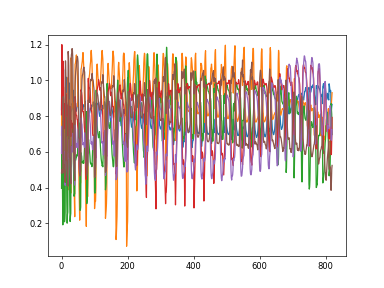

<IPython.core.display.Javascript object>


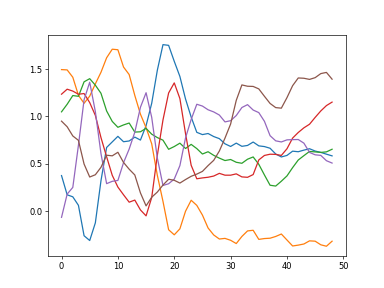

<IPython.core.display.Javascript object>


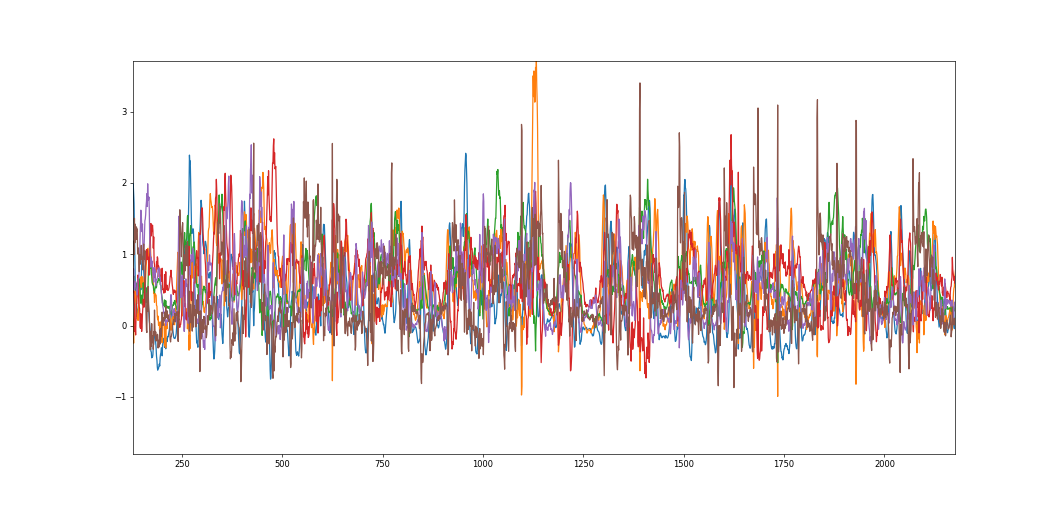

<IPython.core.display.Javascript object>


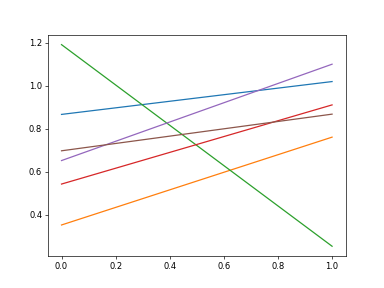

In [35]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure()
plt.plot(ntf_obj.factors1.cpu().detach().numpy())
plt.figure()
plt.plot(ntf_obj.factors2.cpu().detach().numpy())
plt.figure()
plt.plot(ntf_obj.factors3.cpu().detach().numpy())
plt.figure()
plt.plot(ntf_obj.factors4.cpu().detach().numpy())

In [172]:
del tensor
# del core
del factors
del rec

NameError: name 'rec' is not defined

In [167]:
del rec_error

NameError: name 'rec_error' is not defined

In [174]:
del optimizer
del loss

NameError: name 'optimizer' is not defined

In [175]:
import gc
gc.collect()

155

In [177]:
torch.cuda.empty_cache()

old code from Jean

In [ ]:
# Now we just iterate through the training loop and backpropagate...

import time

n_iter = 1000
lr = 0.05
penalty = 0.1

prox_plus = nn.Threshold(0,0) ## to make all output postive 

optimizer = torch.optim.Adam(factors, lr=lr)

tic = time.time()
for i in range(1, n_iter):
    print(f'hi {i}')
    # Important: do not forget to reset the gradients
    optimizer.zero_grad()

    # Reconstruct the tensor from the decomposed form
#     rec = tucker_to_tensor((core, factors))
    rec = prox_plus(tl.cp_tensor.cp_to_tensor((weights, factors)))

    # squared l2 loss
#     loss = (tl.norm(rec - tensor, 2)).cpu().detach()
    loss = tl.norm((rec - tensor), 2)

    # squared l2 penalty on the factors of the decomposition
    for f in factors:
        loss = loss + penalty * f.pow(2).sum()

    loss.backward()
    optimizer.step()
    
#     factors = np.abs(factors)

    if i % 1 == 0:
        toc = time.time()
        print(round(toc-tic,2))
        rec_error = tl.norm(rec.data - tensor.data, 2)/tl.norm(tensor.data, 2)
        print("Epoch {},. Rec. error: {}".format(i, rec_error))
        tic = time.time()